In [1]:
#imports
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

In [2]:
processed_data_path = os.path.join(os.path.pardir, 'data', 'processed')
print(processed_data_path)

..\data\processed


In [7]:
#Train & Test files
train_users_file = os.path.join(processed_data_path, 'train_users.csv')
test_users_file = os.path.join(processed_data_path, 'test_users.csv')
train_users_df = pd.read_csv(train_users_file)
test_users_df = pd.read_csv(test_users_file)
y_file =  os.path.join(processed_data_path, 'processed_train_target_data.csv')
y_mapping_file =  os.path.join(processed_data_path, 'target_data_mapping.csv')
y_df = pd.read_csv(y_file)
y_mapping_df = pd.read_csv(y_mapping_file)
y_mapping = {}

In [8]:
for i in range(len(y_mapping_df)):
    y_mapping[i]= y_mapping_df.loc[i, 'country_destination']

In [9]:
y_mapping

{0: 'NDF',
 1: 'other',
 2: 'US',
 3: 'FR',
 4: 'CA',
 5: 'GB',
 6: 'ES',
 7: 'IT',
 8: 'PT',
 9: 'NL',
 10: 'DE',
 11: 'AU'}

In [10]:
train_users_df.head()

,id,age,gender_known,is_male,lookup,search_results,personalize,index,similar_listings,ajax_refresh_subtotal,...,language_nl,language_no,language_pl,language_pt,language_ru,language_sv,language_th,language_tr,language_zh,session_known
0,gxn3p5htnn,36.852359,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,820tgsjxq7,38.000000,1,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,bjjt8pjhuk,42.000000,1,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,osr2jwljor,36.852359,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,lsw9q7uk0j,46.000000,1,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
train_id_df = train_users_df.id
test_id_df = test_users_df.id
test_users_df=test_users_df.drop(columns=['id'])
train_users_df=train_users_df.drop(columns=['id'])

In [6]:
train_users_df.head()

,age,gender_known,is_male,lookup,search_results,personalize,index,similar_listings,ajax_refresh_subtotal,show,...,language_nl,language_no,language_pl,language_pt,language_ru,language_sv,language_th,language_tr,language_zh,session_known
0,36.852359,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,38.000000,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,42.000000,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,36.852359,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,46.000000,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
print(len(train_users_df))
print(len(y_df))

213422
213422


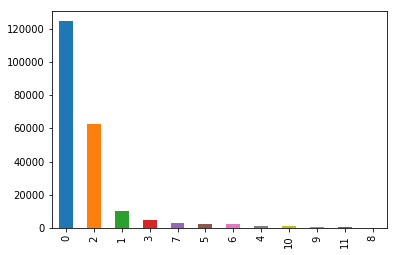

In [13]:
y_df.country_destination.value_counts().plot(kind='bar')

In [14]:
100*(len(y_df[y_df['country_destination']==0])/len(y_df))

58.35527733785645

In [26]:
# 58% oftrain data choose NDF
# output file with all test_data having country_destination = 'NDF' is supposed to pass by accuracy>0.5
columns = ['id','country']
subm1_df = pd.DataFrame( columns=columns)
subm1_df.id = test_id_df
subm1_df.country = 'NDF'

In [28]:
subm1_df.head()

,id,country
0,5uwns89zht,NDF
1,jtl0dijy2j,NDF
2,xx0ulgorjt,NDF
3,6c6puo6ix0,NDF
4,czqhjk3yfe,NDF


In [12]:
#subm1_file = os.path.join(processed_data_path, 'subm1.csv')
#subm1_df.to_csv(subm1_file, index=False)
# Submission Score was .67908

In [13]:
#Split training data into train and test
X = train_users_df
y = y_df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

In [87]:
print(len(X))
print(len(y))

213422
213422


In [88]:
test_users_df.head()

,age,gender_known,is_male,lookup,search_results,personalize,index,similar_listings,ajax_refresh_subtotal,show,...,language_nl,language_no,language_pl,language_pt,language_ru,language_sv,language_th,language_tr,language_zh,session_known
0,35.000000,1,0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0,0,0,0,0,0,0,0,0,1
1,36.852359,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0,0,0,0,0,0,0,0,0,1
2,36.852359,0,0,0.0,32.0,6.0,16.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1
3,36.852359,0,0,0.0,0.0,3.0,1.0,0.0,1.0,2.0,...,0,0,0,0,0,0,0,0,0,1
4,36.852359,0,0,0.0,0.0,1.0,0.0,1.0,1.0,3.0,...,0,0,0,0,0,0,0,0,0,1


In [38]:
# Let's Start with simple model
clfLR = LogisticRegression()
clfLR.fit(X_train, y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [40]:
#Accuracy on training data
y_predict_train = clfLR.predict(X_train)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, y_predict_train)))

Accuracy: 0.6187


In [42]:
y_predict_test = clfLR.predict(X_test)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, y_predict_test)))

Accuracy: 0.6207


In [15]:
clfRF = RandomForestClassifier(n_estimators=105, max_depth=25,random_state=0)
clfRF.fit(X_train, y_train.values.ravel())
y_predict_test = clfRF.predict(X_test)

In [16]:
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, y_predict_test)))

Accuracy: 0.6364


In [ ]:
clfRF = RandomForestClassifier(n_estimators=105, max_depth=25,random_state=0)
clfRF.fit(train_users_df, y_df.values.ravel())
y_test = clfRF.predict(test_users_df)
columns = ['id','country']
subm2_df = pd.DataFrame( columns=columns)
subm2_df.id = test_id_df
subm2_df.country = 'NDF'
for i in range(len(y_test)):
    print(i)
    subm2_df.loc[i, 'country'] = str(y_mapping_df[y_test[i]])
subm2_file = os.path.join(processed_data_path, 'subm2.csv')
subm2_df.to_csv(subm2_file, index=False)
#Submitted subm2 prediction on kaggle and score 0.73